## 判断模型性能

**判断模型太简单或太复杂：**
1. 表现
    + **过拟合**：model在训练集上表现良好，但是在CV上表现非常糟糕；
    + **欠拟合**：model在二者上表现都不佳。
2. 绘制学习曲线

In [17]:
import numpy as np
np.random.seed(42)

In [18]:
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X ** 2 + X + 2 + np.random.randn(m, 1)

In [19]:
from sklearn.preprocessing import PolynomialFeatures

In [20]:
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [22]:
import matplotlib.pyplot as plt
%matplotlib inline

In [26]:
def plot_learning_curve(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(
        X, y, test_size=0.2, random_state=42)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_pred = model.predict(X_train[:m])
        y_val_pred = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m], y_train_pred))
        val_errors.append(mean_squared_error(y_val, y_val_pred))

    plt.plot(range(1, len(X_train)), np.sqrt(train_errors),
             'r-+', lw=2, label='train')
    plt.plot(range(1, len(X_train)), np.sqrt(val_errors),
             'b-', lw=2, label='val')
    plt.xlabel('Training set size', fontsize=14)
    plt.ylabel('RMSE', fontsize=14)
    plt.legend(fontsize=14)

In [27]:
from sklearn.linear_model import LinearRegression

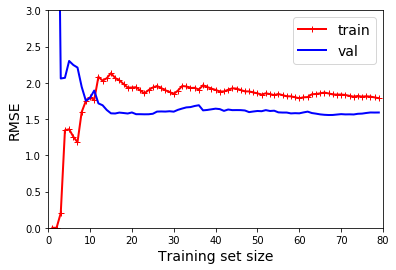

In [32]:
lin_reg = LinearRegression()
plot_learning_curve(lin_reg, X, y)
plt.axis([0, 80, 0, 3])
plt.show()

这条学习曲线是典型的模型拟合不足。两条曲线均到达高地，非常接近，而且相当高。

**model对训练数据拟合不足，添加更多的数据也无济于补。需要使用更复杂的模型或找到更好的特征。**

In [14]:
from sklearn.pipeline import Pipeline

In [29]:
polynomial_reg = Pipeline([
    ('poly_features', PolynomialFeatures(degree=10, include_bias=False)),
    ('lin_reg', LinearRegression())
])

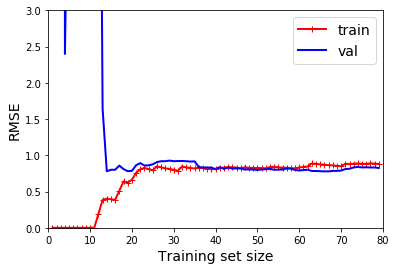

In [31]:
plot_learning_curve(polynomial_reg, X, y)
plt.axis([0, 80, 0, 3])
plt.show()

如果两条曲线有间隔，则是过拟合。